# Analise de Acidentes

    Copyright (C) 2019 - Luis Vitório
    Analise de Acidentes de Trânsito

    Este programa é um software livre: você pode redistribuí-lo e/ou
    modificá-lo sob os termos da Licença Pública Geral Affero GNU,
    conforme publicado pela Free Software Foundation, seja a versão 3
    da Licença ou (a seu critério) qualquer versão posterior.

    Este programa é distribuído na esperança de que seja útil,
    mas SEM QUALQUER GARANTIA; sem a garantia implícita de
    COMERCIALIZAÇÃO OU ADEQUAÇÃO A UM DETERMINADO PROPÓSITO. Veja a
    Licença Pública Geral Affero GNU para obter mais detalhes.

    Você deve ter recebido uma cópia da Licença Pública Geral Affero GNU
    junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.

    linkedin: https://www.linkedin.com/in/vitorioluis/
    email: vitorioluis@gmail.com

#### Dados obtidos de <https://www.prf.gov.br/portal/dados-abertos/acidentes>

#### Ferramentas utilizadas para realizar o Data Analytics
<img src="./img/1.png" >

In [64]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Fase 1
#### Importar e tratar os dados

In [69]:
# arquivo por formato
def filtrar_arquivo(tipo):
    path = './'
    lst_arq = os.listdir(path) # listando novamente o diretório para verificar arquivos csv
    return [arq for arq in lst_arq if arq[-3:] == tipo]

# Separa arquivo zip caso haja outros tipos de arquivo na pasta
lst_zip = filtrar_arquivo('zip')

# extrair arquivos do zip para trabalhar
for zp in lst_zip:
    print(zp)
    fzp = zipfile.ZipFile(zp)
    fzp.extractall('./') 
    fzp.close()

# Separa arquivo csv caso haja outros tipos de arquivo no diretório
lst_csv = filtrar_arquivo('csv')

# criar dataframe vazio para unir as bases
df_acidentes = pd.DataFrame()

# É hora de ler os arquivos csv e consolidar no dataframe
for csv in lst_csv:
    print(csv)
    df = pd.read_csv(csv, sep=';', encoding='latin1')
    df_acidentes = df_acidentes.append(df)
    os.remove(csv)

acidentes2017_todas_causas_tipos.zip
acidentes2018_todas_causas_tipos.zip
acidentes2019_todas_causas_tipos.zip
acidentes2017_todas_causas_tipos.csv
acidentes2018_todas_causas_tipos.csv
acidentes2019_todas_causas_tipos.csv


In [70]:
# verificar se está tudo ok
df_acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8.0,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Sim,...,Masculino,0,0,1,0,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9.0,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Sim,...,Masculino,1,0,0,0,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,2.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Feminino,0,1,0,0,-23.3695,309.935,SR-PR,DEL7/7,UOP07/PR
3,11.0,3.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Masculino,0,1,0,0,-23.3695,309.935,SR-PR,DEL7/7,UOP07/PR
4,12.0,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS ...,Sim,...,Masculino,0,0,1,0,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO


In [71]:
# quantidades de linhas e colunas
df_acidentes.shape

(684974, 37)

##### Nosso conjunto de dados contém 270.912 linhas divididas em 37 colunas

In [72]:
# nome das colunas
df_acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [6]:
# informações sobre tipos de campos, e dados faltantes
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408578 entries, 0 to 204288
Data columns (total 37 columns):
id                        408578 non-null int64
pesid                     408576 non-null float64
data_inversa              408578 non-null object
dia_semana                408578 non-null object
horario                   408578 non-null object
uf                        408578 non-null object
br                        407930 non-null float64
km                        407930 non-null object
municipio                 408578 non-null object
causa_principal           408578 non-null object
causa_acidente            408578 non-null object
ordem_tipo_acidente       408578 non-null int64
tipo_acidente             408578 non-null object
classificacao_acidente    408578 non-null object
fase_dia                  408578 non-null object
sentido_via               408578 non-null object
condicao_metereologica    408578 non-null object
tipo_pista                408578 non-null object
tracado

In [53]:
df_acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
155934,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155935,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155936,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155937,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155938,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES


In [57]:
# plot de calor adaptado para verificar dados faltantes em amarelo
def grafico_dados_faltantes():
    plt.figure(figsize=(15,10))
    return sns.heatmap(df_acidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis');

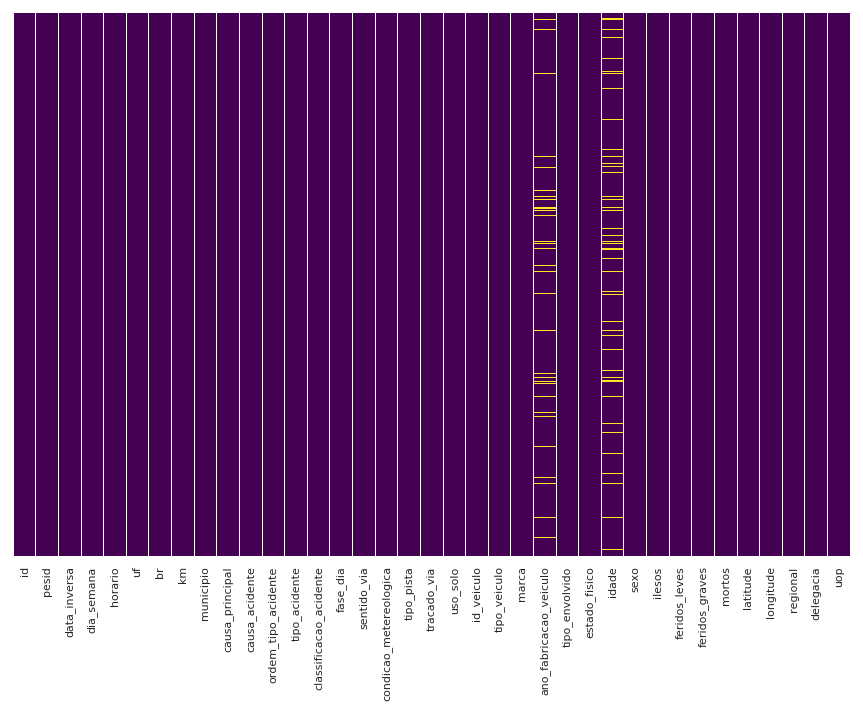

In [9]:
grafico_dados_faltantes();

##### No gráfico acima podemos observar os dados faltantes em amarelo, apenas 4 colunas contém dados faltantes:
#####   * "br" => Nome da rodovia
#####   * "km" => kilômetro onde aconteceu o acident 
#####   * "idade" => idade do contutor do veículo
#####   * "ano_fabricacao_veiculo" => como o próprio nome ja diz ano de fabricação do veículo

In [8]:
def faixa_etaria(idade):
    if idade <= 10:
        _faixa = '0-10'
    elif idade <= 20:
        _faixa = '11-20'    
    elif idade <= 30:
        _faixa = '21-30'
    elif idade <= 40:
        _faixa = '31-40'
    elif idade <= 50:
        _faixa = '41-50'
    elif idade <= 60:
        _faixa = '51-60'
    elif idade <= 70:
        _faixa = '61-70'
    else:
        _faixa = '+70'
    return _faixa

In [74]:
# Aplica a média de idade para preencher os dados faltandes da coluna "idade"
df_acidentes['idade'].fillna((df_acidentes['idade'].mean(skipna=True)),inplace=True)

# gerar a média do ano de fabricação
ano_medio_fabricacao = int(df_acidentes['ano_fabricacao_veiculo'].mean())

# tratando o ano médio de fabricação do veículo
df_acidentes['ano_fabricacao_veiculo'].fillna((ano_medio_fabricacao), inplace=True);

# tratando o campo 'br' que não estão preenchidas
# subistitui o Nulo por Zero(0)
df_acidentes['br'] = df_acidentes['br'].fillna(0) 

# converte em inteiro para remover casa decimal
df_acidentes['br'] = df_acidentes['br'].astype(int)

# converte em str
df_acidentes['br'] = df_acidentes['br'].astype(str) 

# preenche os campos de valores Zero(0) 
df_acidentes.loc[df_acidentes['br'] == '0','br'] = 'Nome da BR não preenchido' 

# normalizando dados(coluna br com o tamanho de 3 caracteres)
df_acidentes['br'] = df_acidentes['br'].apply(lambda n: '0' * (3 - len(n)) + n if len(n) < 3 else n); 

# converte em str e substitui ',' por '.' para em seguida converter em float
df_acidentes['km']=df_acidentes['km'].apply(lambda x: str(x).replace(".","").replace(",","."))

# converte em float
df_acidentes['km'] = df_acidentes['km'].astype(float)

# aplica a média do km nos campos vazios
df_acidentes['km'].fillna((df_acidentes['km'].mean(skipna=True)),inplace=True)

# criando grupos de faixa etária
df_acidentes['faixa_etaria']=df_acidentes['idade'].apply(faixa_etaria)

# criar coluna ano
df_acidentes['ano']=df_acidentes['data_inversa'].apply(lambda x: x[0:4])

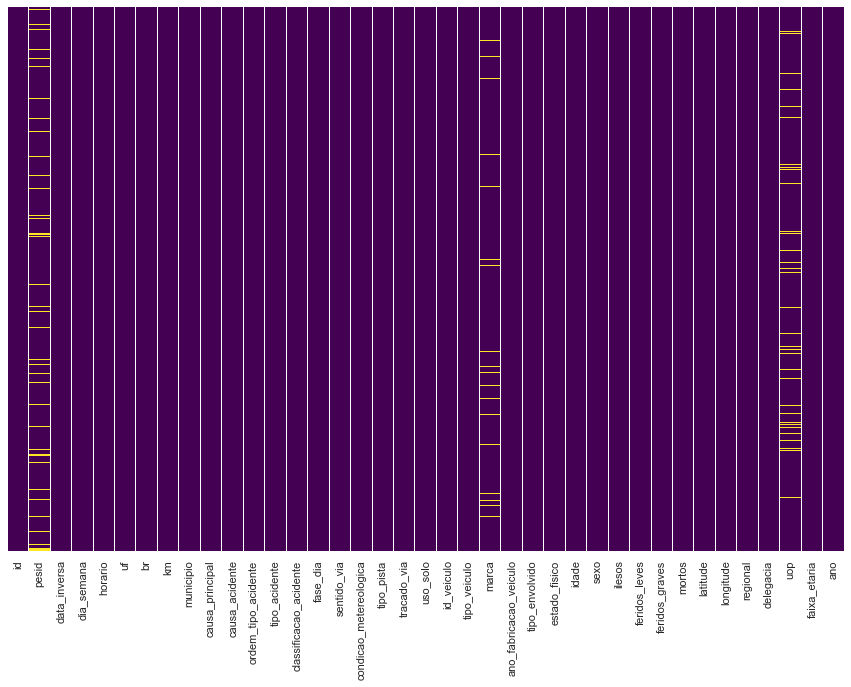

In [58]:
grafico_dados_faltantes();

#### Agora que normalizamos nossos dados e não temos dados faltantes como podemos observar no gráfico, seguiremos para próxima fase.

## Fase 2

### Conhecer/Explorar os dados

##### Para não precisar toda hora ficar digitando a mesma coisa em graficos uma função básica para gerar gráfico 

In [59]:
# total de linha que contém no dataframe
ncount = len(df_acidentes)

In [60]:
# função para gerar gráfico padrão
def gerar_grafico_padrao(campo, largura=10, altura=14, df = df_acidentes,titulo='Acidentes'):
    
    ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
    ax.set_alpha(0.8)
    ax.set_xlabel('Números de Acidentes')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12, color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax
    

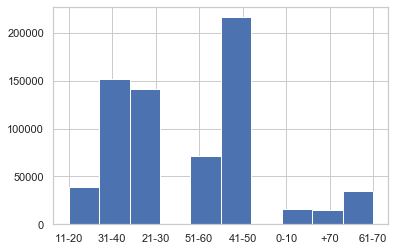

In [75]:
df_acidentes['faixa_etaria'].hist();

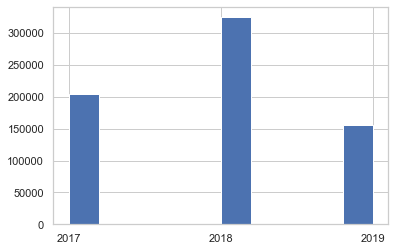

In [76]:
df_acidentes['ano'].hist();

In [77]:
media_idade = df_acidentes['idade'].mean()
mediana_idade = df_acidentes['idade'].median()
print('Média:',media_idade,' Mediana:',mediana_idade)

Média: 40.93908884537402  Mediana: 40.0


##### Nesta etapa da nossa analise vamos conhecer bem que temos em nossa base de dados, vamos gerar uma série de gráficos buscando por insights.

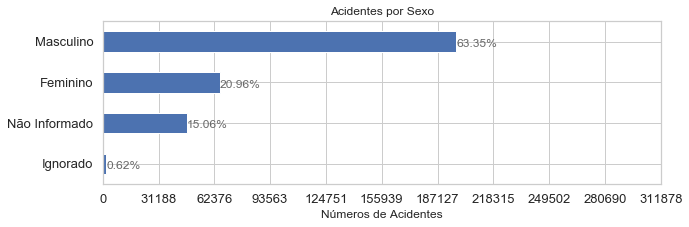

In [80]:
# acidentes por sexo
gerar_grafico_padrao('sexo', altura=3, titulo="Acidentes por Sexo");

##### Tem imagens que 'fala' mais que mil palavras, esse gráfico é um dessas imagem. Os acidentes ocorrido com homens ao volante é mais de 3 vezes maior que os com mulheres ao volante.

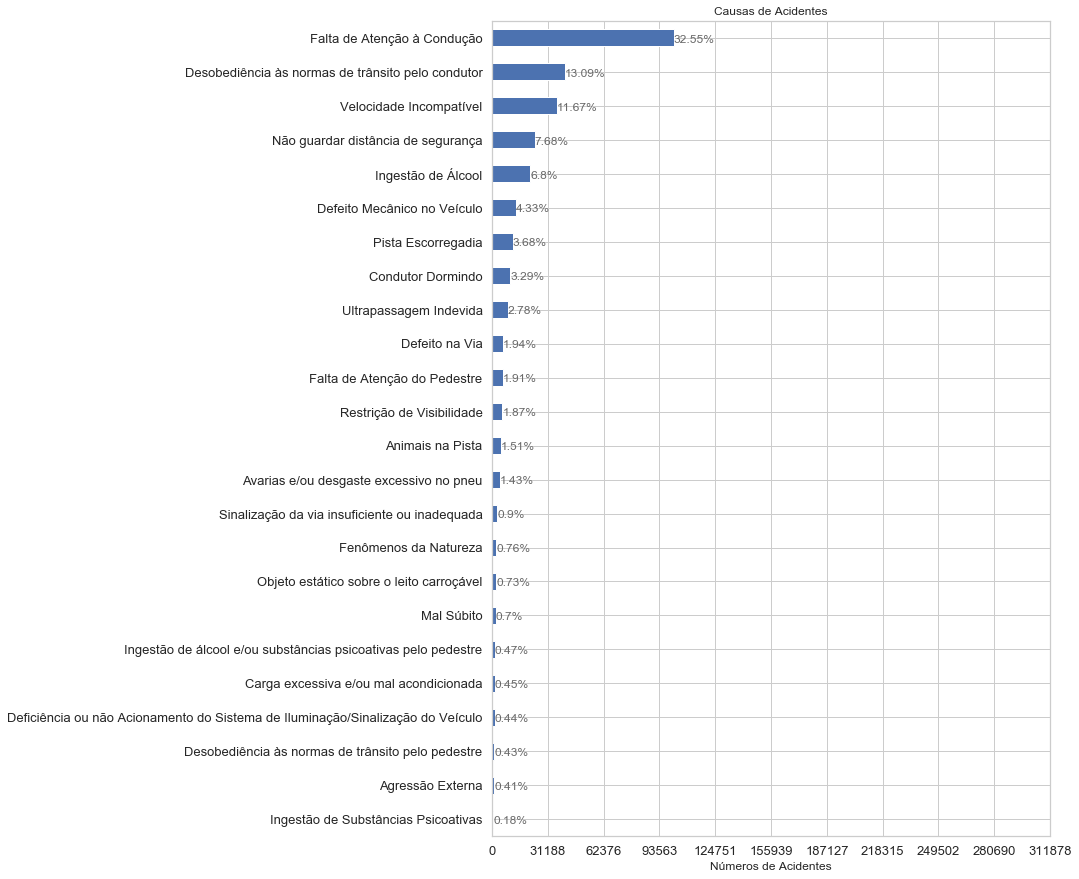

In [81]:
# Gráfico por causa de acidentes.
gerar_grafico_padrao('causa_acidente', altura = 15, largura=10, titulo='Causas de Acidentes');

##### Neste gráfico a categoria "Falta de atenção à condução" é esmagadora estou até surpreso com tamanha desproporção.

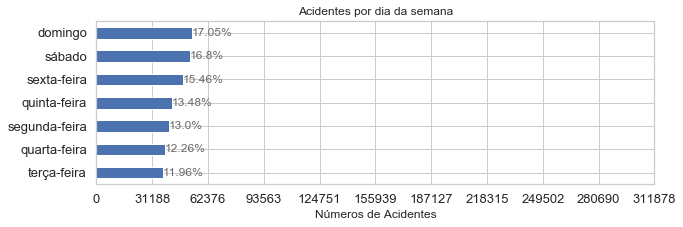

In [82]:
gerar_grafico_padrao('dia_semana', altura=3, largura=10, titulo='Acidentes por dia da semana');

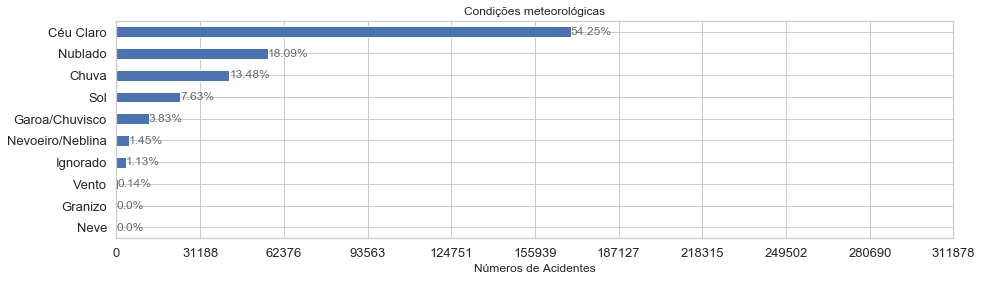

In [83]:
gerar_grafico_padrao('condicao_metereologica', altura=4, largura=15, titulo='Condições meteorológicas');

#### Este gráfico acima para mim é uma surpresa, em condições normais o número de acidentes é muito maior do que em condições adiversas.

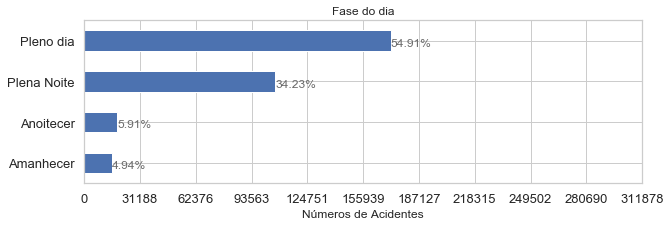

In [86]:
gerar_grafico_padrao('fase_dia', altura = 3, titulo= 'Fase do dia');

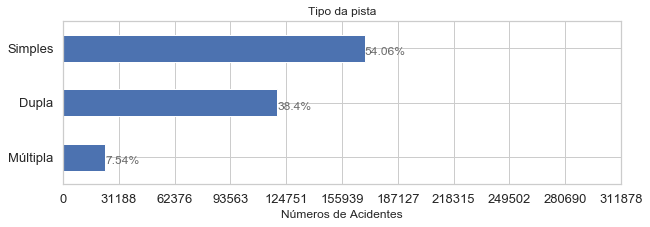

In [87]:
gerar_grafico_padrao('tipo_pista', altura = 3, titulo = 'Tipo da pista');

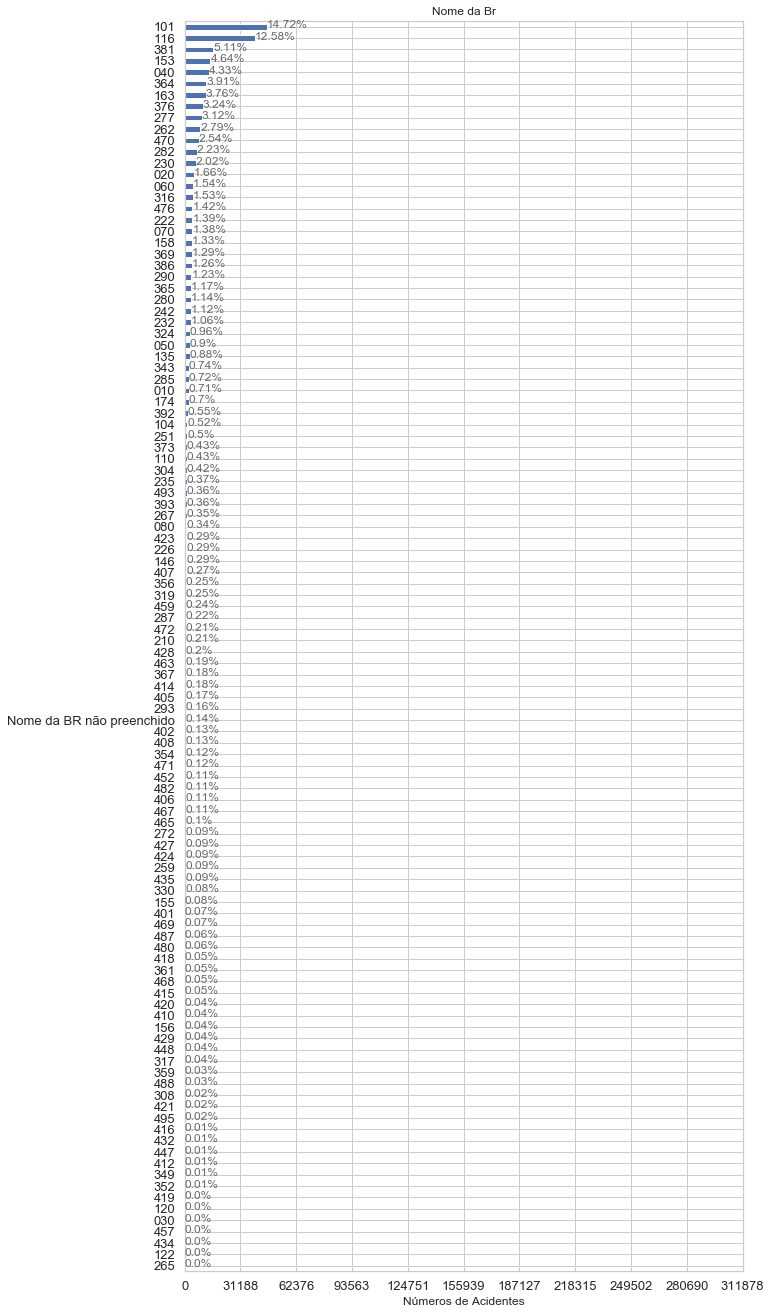

In [88]:
gerar_grafico_padrao('br', largura=10, altura=23, titulo='Nome da Br');

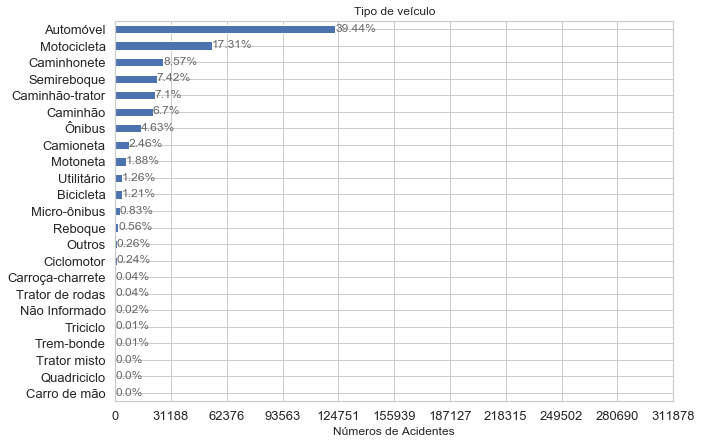

In [89]:
gerar_grafico_padrao('tipo_veiculo', altura=7,titulo='Tipo de veículo');

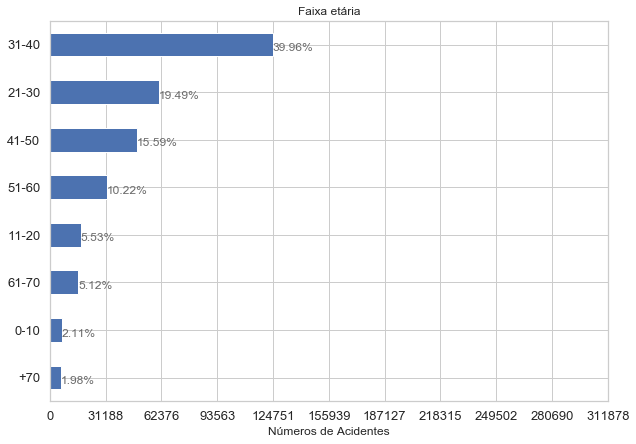

In [90]:
gerar_grafico_padrao('faixa_etaria', altura=7,titulo='Faixa etária');

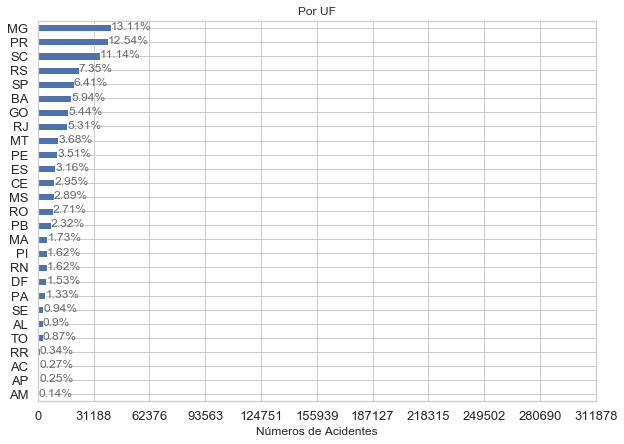

In [91]:
gerar_grafico_padrao('uf', altura=7,titulo='Por UF');

In [92]:
df_acidentes.idade.describe()

count    684974.000000
mean         40.939089
std          64.323787
min          -1.000000
25%          29.000000
50%          40.000000
75%          45.000000
max        2018.000000
Name: idade, dtype: float64

In [99]:
df_acidentes.groupby(['ano','idade'])['ano'].max()


ano   idade  
2017  -1.0       2017
       0.0       2017
       1.0       2017
       2.0       2017
       3.0       2017
                 ... 
2019   1037.0    2019
       1045.0    2019
       1918.0    2019
       1919.0    2019
       2018.0    2019
Name: ano, Length: 386, dtype: object

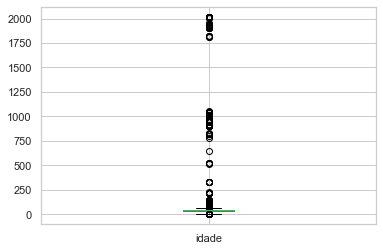

In [93]:
df_acidentes.boxplot(column=['idade'])

In [ ]:
# correlação entre todas as variáveis do nosso dataframe.
plt.figure(figsize=(15,5))
sns.heatmap(df_acidentes.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de Calor de Correlação');

In [ ]:
# Depos de tentar filtar por tipo_veiculo varias vezes não conseguir resultado me ocorreu de verificar 
# como estava os dados e para minha surpresa continha espaço no final 
df_acidentes.tipo_veiculo.unique()

In [ ]:
# Vamos resolver isso aplicando um strip na coluna
df_acidentes['tipo_veiculo'] = df_acidentes['tipo_veiculo'].apply(lambda x : str(x).strip());
df_acidentes.tipo_veiculo.unique()

In [ ]:
# Agora sim vamos separar acidentes ocorrido motocicletas
df_motos = df_acidentes.loc[df_acidentes.tipo_veiculo == 'Motocicleta']
df_motos.shape

In [ ]:
df_motos.tail()